In [3]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 6801-3373

 Directory of C:\Users\USER\OneDrive\Data_Quest\Portfolio Projects\EDA_Titanic_21

24/07/2021  22:15    <DIR>          .
24/07/2021  22:15    <DIR>          ..
19/07/2021  23:32    <DIR>          .ipynb_checkpoints
24/07/2021  22:15                23 .jovianrc
24/07/2021  22:15                15 README.md
24/07/2021  22:15            28,629 test.csv
22/07/2021  14:04            67,022 titanic.ipynb
24/07/2021  22:15            61,194 train.csv
               5 File(s)        156,883 bytes
               3 Dir(s)  76,031,803,392 bytes free


In [5]:
# readig the dateset
df = pd.read_csv('train.csv')

In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.shape

(891, 12)

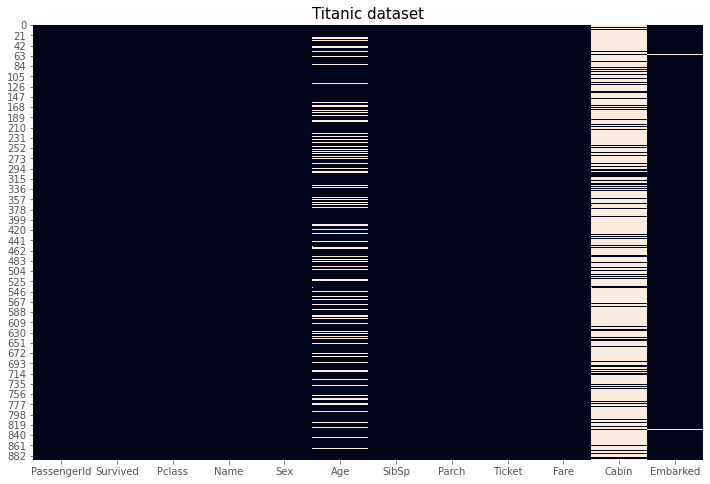

In [11]:
sns.heatmap(df.isnull(), cbar=False) 
plt.title('Titanic dataset', fontsize = 15)
plt.show()

In [12]:
# Let's see if there is any missing data
for cols in df.columns:
    pct_missing = np.mean(df[cols].isnull())*100
    print('{} ***** {}%'.format(cols,pct_missing))

PassengerId ***** 0.0%
Survived ***** 0.0%
Pclass ***** 0.0%
Name ***** 0.0%
Sex ***** 0.0%
Age ***** 19.865319865319865%
SibSp ***** 0.0%
Parch ***** 0.0%
Ticket ***** 0.0%
Fare ***** 0.0%
Cabin ***** 77.10437710437711%
Embarked ***** 0.22446689113355783%


In [13]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    return summary

In [14]:
resumetable(df)

Dataset Shape: (891, 12)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,PassengerId,int64,0,891,1,2,3
1,Survived,int64,0,2,0,1,1
2,Pclass,int64,0,3,3,1,3
3,Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
4,Sex,object,0,2,male,female,female
5,Age,float64,177,88,22.0,38.0,26.0
6,SibSp,int64,0,7,1,1,0
7,Parch,int64,0,7,0,0,0
8,Ticket,object,0,681,A/5 21171,PC 17599,STON/O2. 3101282
9,Fare,float64,0,248,7.25,71.2833,7.925


In [15]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [16]:
def make_pivot (param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart


### I have created a function, which given two parameters, creates a pivot table and a bar chart to show their relationship

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

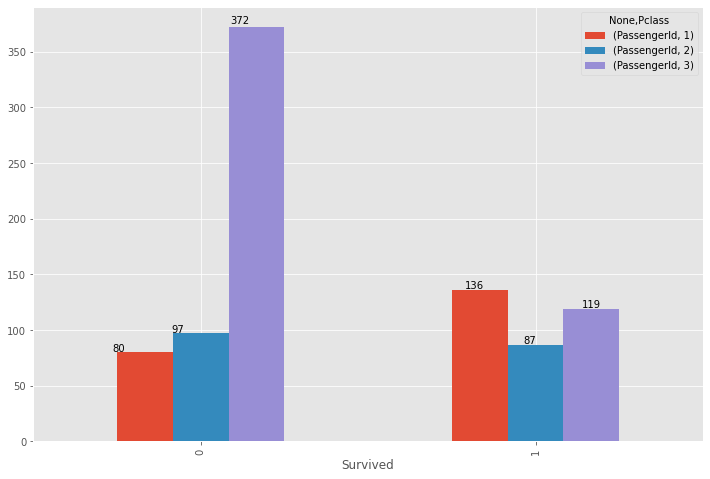

In [17]:
make_pivot ('Survived','Pclass')


#####    What is the distribution of categorical features?

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [18]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Newell, Miss. Marjorie",male,347082,B96 B98,S
freq,1,577,7,4,644


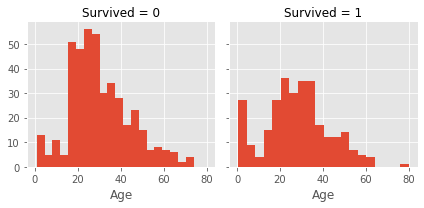

In [19]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)